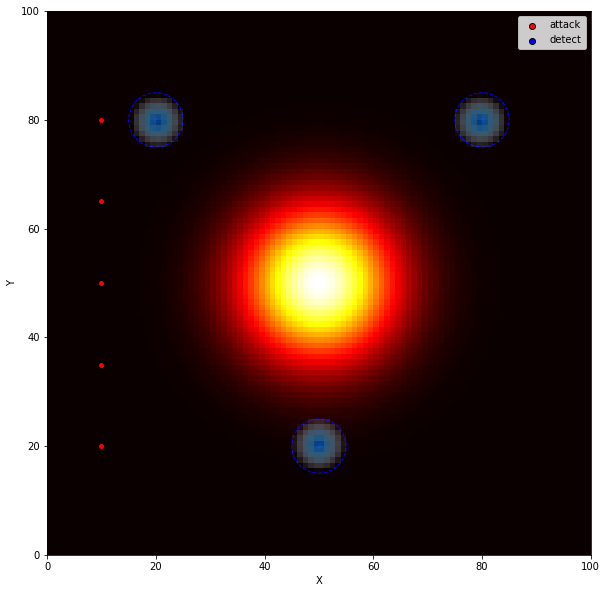

<AxesSubplot:xlabel='X', ylabel='Y'>

In [1]:
import sys
import os

from configs import detector_configs
# Make sure the src and configs folders are importable
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd(), 'configs'))
%matplotlib inline
import numpy as np
from targets import Gaussian
from env import Environment
from attackers import Attacker
from detectors import Detector

# Create a simple 2D Gaussian centered in the middle of a 100x100 grid
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 100.0  # spread out
target = Gaussian(mean, cov)
env = Environment(width, height, target)

# Create some attacker drones (red)
# Position them along the left edge
for i in range(5):
    attacker = Attacker(
        start_position=(10.0, 20.0 + i * 15.0),
        target_position=(90.0, 50.0),
        steps=10
    )
    # For visualization, we'll use the first position in trajectory
    attacker.position = attacker.trajectory[0]
    env.add_atk_drone(attacker)

# Create some detector units (blue)
# Using the actual enum values: RADAR, VISUAL, ACOUSTIC
detector_configs_list = [
    (detector_configs.DetectorType.RADAR, (20.0, 80.0)),
    (detector_configs.DetectorType.VISUAL, (80.0, 80.0)),
    (detector_configs.DetectorType.ACOUSTIC, (50.0, 20.0))
]
for det_type, pos in detector_configs_list:
    detector = Detector(type=det_type, position=pos)
    env.add_detector(detector)

# Visualize the environment
env.visualize(figsize=(10, 10))

Attackers with sampled targets:


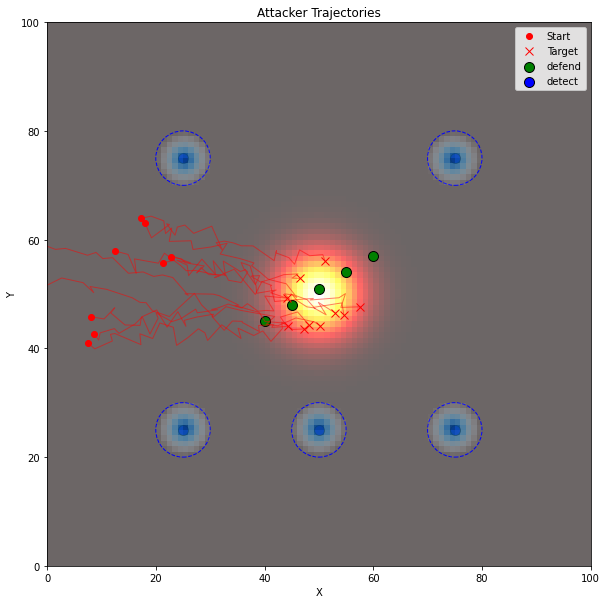

<AxesSubplot:title={'center':'Attacker Trajectories'}, xlabel='X', ylabel='Y'>

In [3]:
# Example: Attackers sample their targets from the Gaussian distribution
# This creates a realistic scenario where attackers target high-probability areas
from attackers import AttackerSwarm
from interceptors import InterceptorUnit
import interceptor_configs
width = 100
height = 100
mean = np.array([width/2.0, height/2.0])
cov = np.eye(2) * 30.0
target = Gaussian(mean, cov)
env3 = Environment(width, height, target)

# Create swarm where targets are sampled from the distribution
# Attackers will naturally target high-probability areas
swarm_sampled = AttackerSwarm(
    start_position=(10.0, 50.0),
    target_distribution=target,  # Sample targets from Gaussian
    number_of_attackers=10,
    spread=15.0,
    noise_std=1.0
)

attacker_list = swarm_sampled.generate_swarm(steps=25)

for attacker in attacker_list:
    attacker.position = attacker.trajectory[0]
    env3.add_atk_drone(attacker)

# Add some interceptors
for i in range(5):
    interceptor = InterceptorUnit(
        type=interceptor_configs.InterceptorType.A,
        position=(40.0 + i * 5.0, 45.0 + i * 3.0)
    )
    env3.add_def_drone(interceptor)

# Add detectors
detector_positions = [(25.0, 75.0), (75.0, 75.0), (50.0, 25.0), (25.0, 25.0), (75.0, 25.0)]
for pos in detector_positions:
    detector = Detector(type=detector_configs.DetectorType.RADAR, position=pos)
    env3.add_detector(detector)

print("Attackers with sampled targets:")
env3.visualize_trajectories(figsize=(12, 10), show_heatmap=True)